<a href="https://colab.research.google.com/github/Mustafaahmed10/Arch-Technology-ML-Manual-2/blob/main/TASK2_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

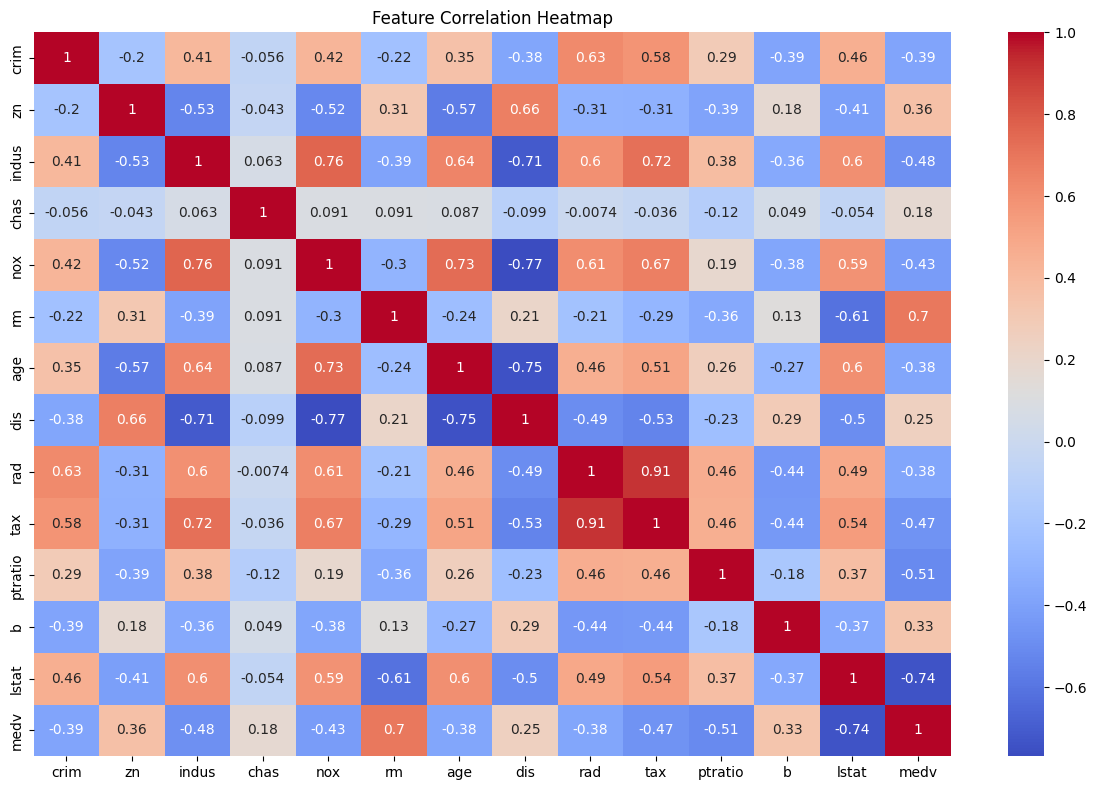

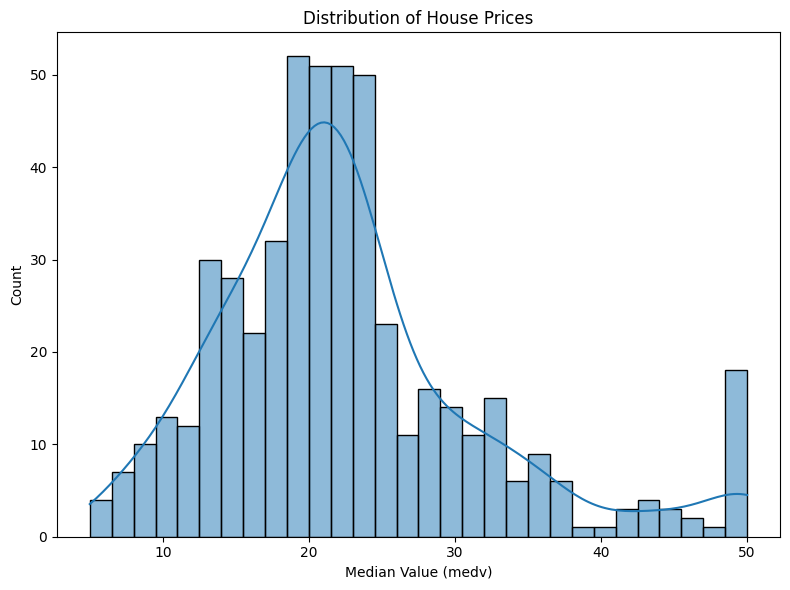

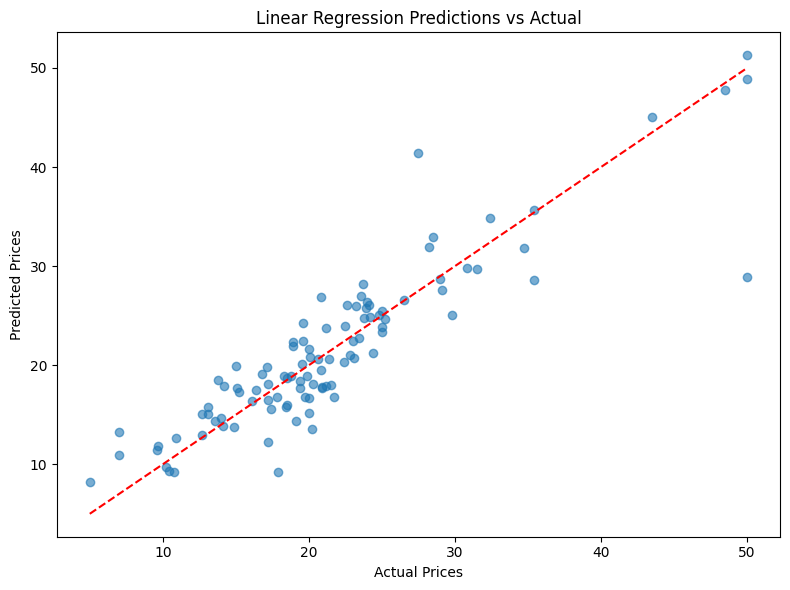

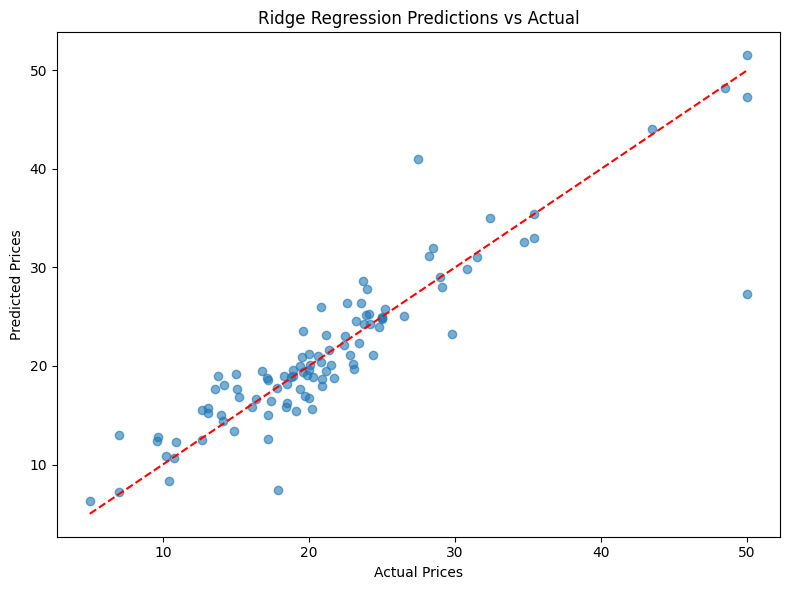

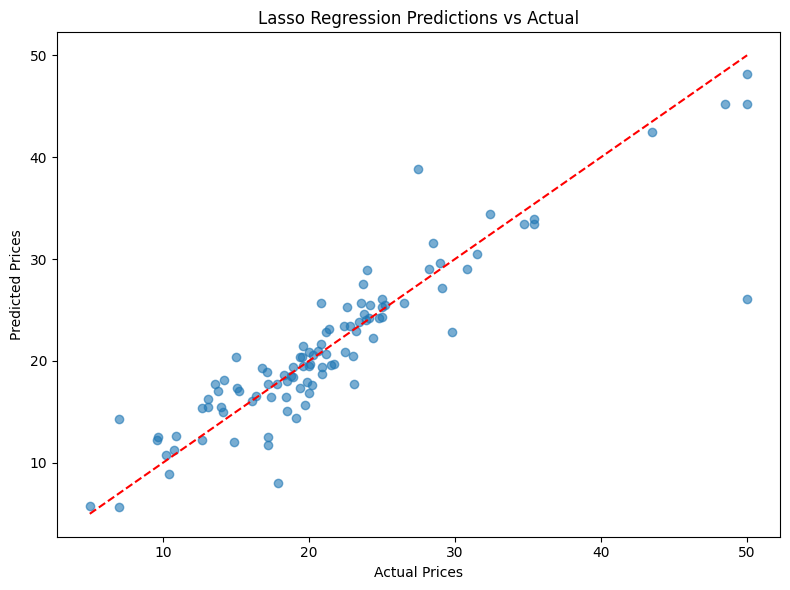

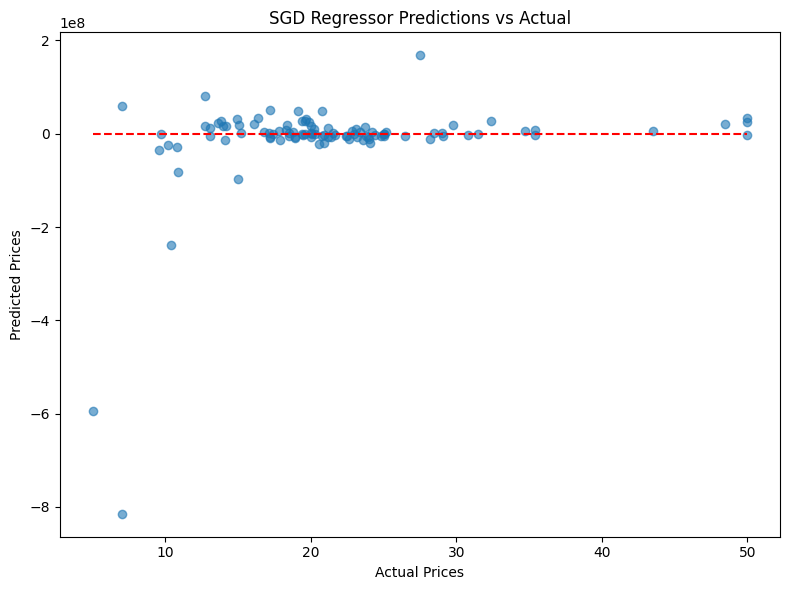

               Model          RMSE      R2 Score  Training Time (s)
0  Linear Regression  3.775889e+00  8.055829e-01              0.031
1   Ridge Regression  3.656185e+00  8.177144e-01              0.020
2   Lasso Regression  3.703369e+00  8.129792e-01              0.006
3      SGD Regressor  1.063541e+08 -1.542427e+14              0.004


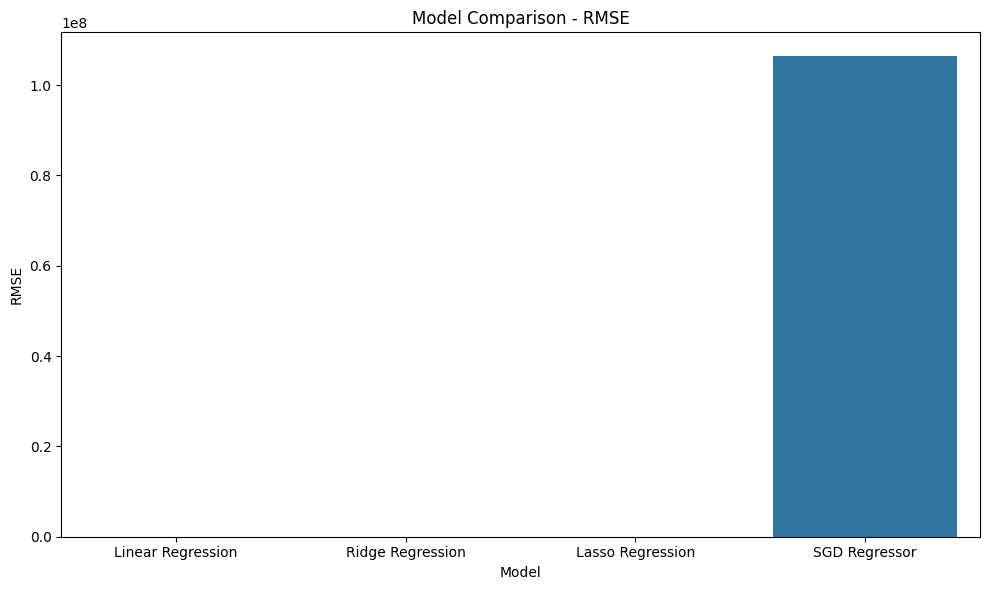

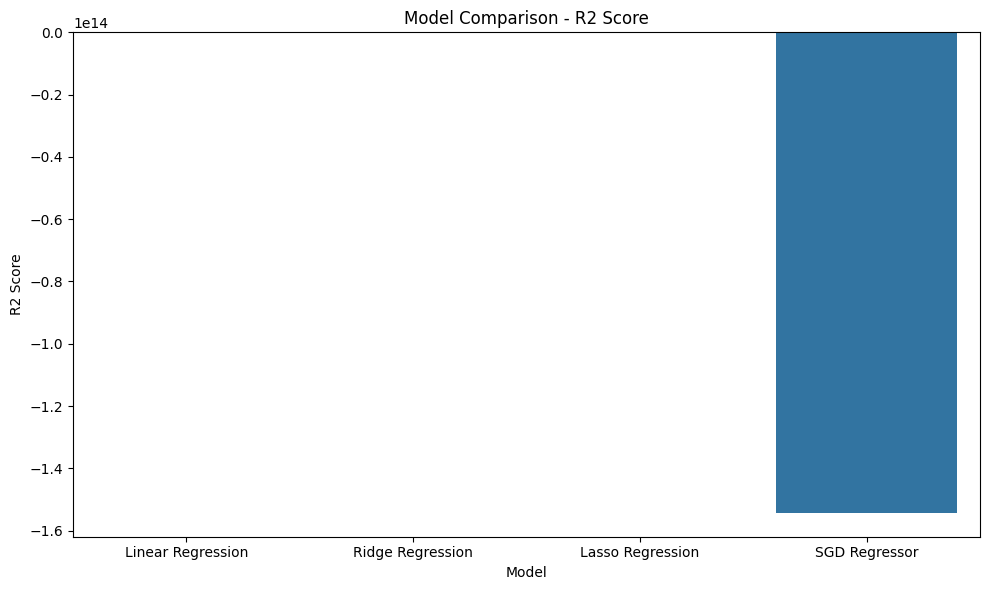

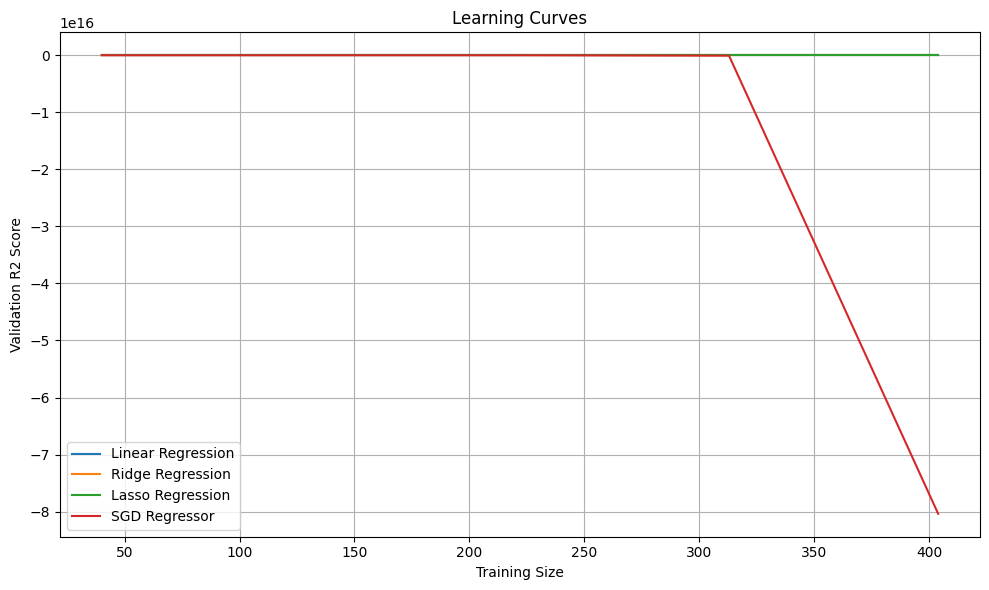

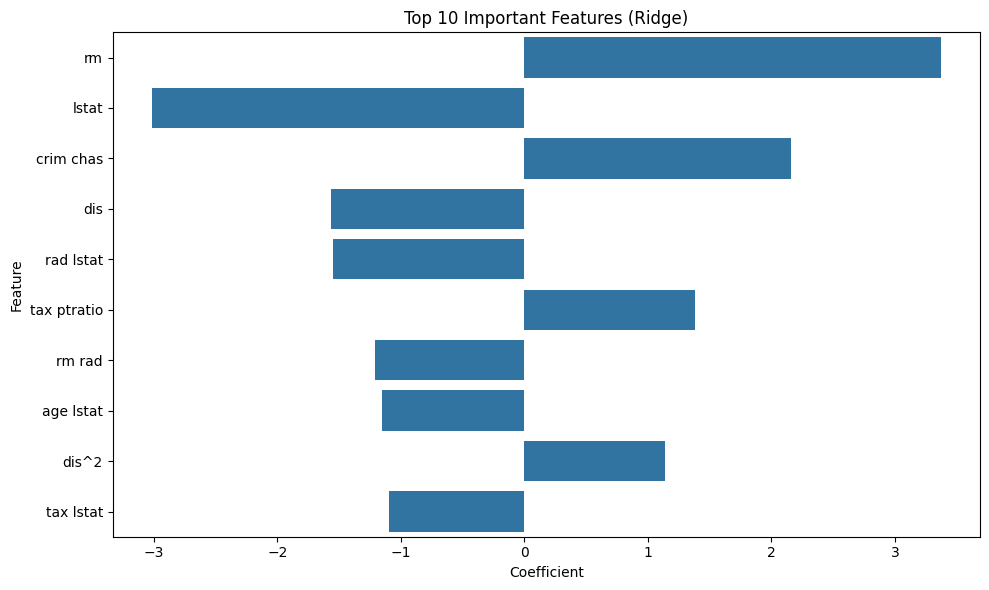

Best Ridge alpha: 10
Best CV R2 Score: 0.8490917401755453

Final Recommendation: Use Ridge Regression with alpha = 10


In [ ]:
# Full Machine Learning Pipeline: House Prices Dataset (Regression)

# Step 1: Install dependencies
!pip install -q pandas numpy scikit-learn matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from time import time

# Step 3: Load dataset (Kaggle House Prices)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Step 4: Data preprocessing
X = data.drop("medv", axis=1)
y = data["medv"]

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Median Value (medv)")
plt.tight_layout()
plt.show()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial feature expansion
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 5: Train models
results = []
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.1),
    "SGD Regressor": SGDRegressor(alpha=0.0001, penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
}

for name, model in models.items():
    start = time()
    model.fit(X_train, y_train)
    end = time()
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, r2, round(end - start, 3)])

    # Visualize predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name} Predictions vs Actual")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.tight_layout()
    plt.show()

# Step 6: Results table
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score", "Training Time (s)"])
print(results_df)

# Bar plot of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("Model Comparison - RMSE")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.title("Model Comparison - R2 Score")
plt.tight_layout()
plt.show()

# Step 7: Learning curves
fig, ax = plt.subplots(figsize=(10, 6))
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_poly, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 5))
    test_scores_mean = test_scores.mean(axis=1)
    ax.plot(train_sizes, test_scores_mean, label=name)

ax.set_title("Learning Curves")
ax.set_xlabel("Training Size")
ax.set_ylabel("Validation R2 Score")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Feature importance (Ridge)
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
coefs = ridge_model.coef_
feature_names = poly.get_feature_names_out(X.columns)

importance_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
importance_df = importance_df.reindex(importance_df.Coefficient.abs().sort_values(ascending=False).index)

# Top 10 influential features
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Important Features (Ridge)")
plt.tight_layout()
plt.show()

# Step 9: Hyperparameter tuning (Grid Search for Ridge)
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), param_grid, scoring="r2", cv=5)
gs.fit(X_train, y_train)
print("Best Ridge alpha:", gs.best_params_["alpha"])
print("Best CV R2 Score:", gs.best_score_)

# Final Observation
print("\nFinal Recommendation: Use Ridge Regression with alpha =", gs.best_params_["alpha"])